In [ ]:
import os
import pandas as pd

os.getcwd()

'/content'

# Upload Files

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load DataSets as pandas DFs

In [ ]:
# Dataset is now stored in a Pandas Dataframe
df_fossil_fuels_share_energy = pd.read_csv('fossil-fuels-share-energy.csv')
df_co2_emissions_transport = pd.read_csv('co2-emissions-transport (1).csv')
df_ghg_emissions_bysector = pd.read_csv('ghg-emissions-by-sector.csv')
df_renewable_share_energy = pd.read_csv('renewable-share-energy.csv')
df_share_electricity_fossil = pd.read_csv('share-electricity-fossil-fuels.csv')
df_share_electricity_renewables = pd.read_csv('share-electricity-renewables.csv')

In [ ]:
df_share_electricity_renewables.dtypes

Entity                         object
Code                           object
Year                            int64
Renewables (% electricity)    float64
dtype: object

In [ ]:
df_share_electricity_fossil.dtypes

Entity                           object
Code                             object
Year                              int64
Fossil fuels (% electricity)    float64
dtype: object

In [ ]:
merge1 = df_share_electricity_fossil.merge(df_share_electricity_renewables, how='inner', on=['Entity', 'Year'])

In [ ]:
merge1 = merge1.drop(labels=['Code_x','Code_y'], axis=1)

# Merge DFs

In [ ]:
df_arr = [df_fossil_fuels_share_energy,
          df_co2_emissions_transport,
          df_ghg_emissions_bysector, 
          df_renewable_share_energy,
          df_share_electricity_fossil ,
          df_share_electricity_renewables]

In [ ]:
len(df_arr)

6

In [ ]:
dfs_clean = [df.drop('Code', axis=1) for df in df_arr]

In [ ]:
[df.columns for df in dfs_clean]

[Index(['Entity', 'Year', 'Fossil fuels (% equivalent primary energy)'], dtype='object'),
 Index(['Entity', 'Year', 'Transport'], dtype='object'),
 Index(['Entity', 'Year', 'Agriculture', 'Land-use change and forestry',
        'Waste', 'Industry', 'Manufacturing and construction', 'Transport',
        'Electricity and heat', 'Buildings', 'Fugitive emissions',
        'Other fuel combustion', 'Aviation and shipping'],
       dtype='object'),
 Index(['Entity', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object'),
 Index(['Entity', 'Year', 'Fossil fuels (% electricity)'], dtype='object'),
 Index(['Entity', 'Year', 'Renewables (% electricity)'], dtype='object')]

In [ ]:
merged = dfs_clean[0]
for df in dfs_clean[1:]:
  merged = merged.merge(df, how='inner', on=['Entity', 'Year'])

In [ ]:
merged

,Entity,Year,Fossil fuels (% equivalent primary energy),Transport_x,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport_y,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping,Renewables (% equivalent primary energy),Fossil fuels (% electricity),Renewables (% electricity)
0,Africa,1990,92.514580,1.092700e+08,5.846800e+08,6.096700e+08,1.121300e+08,3.407000e+07,1.153900e+08,1.120700e+08,2.420300e+08,8.698000e+07,2.607300e+08,8.300000e+06,2.735000e+07,6.568428,78.513489,18.207287
1,Africa,1991,92.044861,1.145800e+08,5.932200e+08,6.096700e+08,1.168300e+08,3.638000e+07,1.086200e+08,1.174800e+08,2.478500e+08,8.967000e+07,2.855000e+08,8.960000e+06,2.766000e+07,6.961744,77.709892,18.917315
2,Africa,1992,92.453239,1.205900e+08,6.011100e+08,6.096700e+08,1.215100e+08,3.761000e+07,1.054200e+08,1.236500e+08,2.536400e+08,9.219000e+07,2.825400e+08,9.080000e+06,2.978000e+07,6.552484,78.857788,17.901201
3,Africa,1993,92.803757,1.196600e+08,6.021500e+08,6.096600e+08,1.263000e+08,3.794000e+07,9.769000e+07,1.227300e+08,2.659900e+08,9.612000e+07,2.966200e+08,1.137000e+07,2.980000e+07,6.421021,80.471237,16.991568
4,Africa,1994,92.708412,1.212600e+08,6.109600e+08,6.096600e+08,1.340500e+08,9.514000e+07,8.957000e+07,1.243700e+08,2.717100e+08,9.747000e+07,3.107100e+08,1.269000e+07,3.543000e+07,6.290524,80.176514,16.630819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,World,2015,85.129959,7.725160e+09,5.682100e+09,7.864600e+08,1.543590e+09,2.685920e+09,6.370430e+09,7.923230e+09,1.505971e+10,2.968200e+09,3.211030e+09,6.411100e+08,1.195600e+09,10.498747,66.072922,22.705212
2376,World,2016,84.721382,7.871780e+09,5.728560e+09,1.267610e+09,1.560850e+09,2.785780e+09,6.183870e+09,8.073900e+09,1.508151e+10,3.005850e+09,3.202100e+09,6.416600e+08,1.237890e+09,10.930195,65.122971,23.519669
2377,World,2017,84.365372,8.072210e+09,5.815960e+09,1.220050e+09,1.583860e+09,2.854380e+09,6.126090e+09,8.278480e+09,1.541696e+10,3.072670e+09,3.242850e+09,6.405700e+08,1.296120e+09,11.355979,64.476578,24.377460
2378,World,2018,84.020882,8.207030e+09,5.803010e+09,1.387560e+09,1.606860e+09,2.967380e+09,6.222670e+09,8.417750e+09,1.587548e+10,3.105540e+09,3.354450e+09,6.273400e+08,1.322290e+09,11.741059,64.027397,25.011549


In [ ]:
merged.shape

(2380, 18)

# Write merged DF to CSV

In [ ]:
merged.to_csv('ghg-data.csv')

In [ ]:
len(merged.Entity.unique())

87

## Merged DF statistics

In [ ]:
merged.describe()

,Year,Fossil fuels (% equivalent primary energy),Transport_x,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport_y,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping,Renewables (% equivalent primary energy),Fossil fuels (% electricity),Renewables (% electricity)
count,2380.000000,2380.000000,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2.380000e+03,2380.000000,2380.000000,2380.000000
mean,2005.466387,84.051475,2.861775e+08,2.510322e+08,3.517935e+07,7.223253e+07,9.325124e+07,2.499712e+08,2.938959e+08,6.196165e+08,1.499674e+08,1.231787e+08,3.112494e+07,4.792461e+07,11.135410,62.588408,24.017172
std,8.413752,15.759229,8.727574e+08,7.118224e+08,3.718059e+08,1.994327e+08,2.955717e+08,7.792913e+08,8.957188e+08,1.811978e+09,4.119137e+08,3.747476e+08,9.035663e+07,1.448307e+08,13.845734,27.547973,24.624377
min,1990.000000,16.456352,5.900000e+05,2.000000e+04,-1.324900e+09,7.000000e+04,1.000000e+04,7.000000e+04,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1999.000000,78.904530,1.107250e+07,6.362500e+06,-2.217750e+07,2.850000e+06,2.780000e+06,6.510000e+06,1.137500e+07,1.702500e+07,3.302500e+06,7.800000e+05,7.500000e+05,1.470000e+06,2.326084,43.436750,6.602675
50%,2006.000000,87.570786,2.758000e+07,2.472000e+07,-8.300000e+05,1.034000e+07,9.175000e+06,2.547500e+07,2.826500e+07,5.463000e+07,1.258500e+07,7.085000e+06,2.590000e+06,4.770000e+06,6.564970,66.597557,16.046595
75%,2013.000000,95.931097,1.206750e+08,9.405500e+07,2.470000e+06,2.316250e+07,3.105500e+07,7.673500e+07,1.239200e+08,2.068900e+08,6.907000e+07,3.734500e+07,1.200250e+07,2.289500e+07,14.187503,86.771118,31.707594
max,2019.000000,100.000015,8.222070e+09,5.815960e+09,2.681330e+09,1.629870e+09,3.055980e+09,6.452880e+09,8.434960e+09,1.587548e+10,3.105540e+09,3.402200e+09,7.753200e+08,1.322290e+09,83.540466,112.454361,99.990532


# EV data preprocessing

## Load EV data

In [ ]:
import io
import pandas as pd
df_ev = pd.read_csv('EV-data.csv')

In [ ]:
df_ev.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Petrol', 'Unnamed: 4',
       'Adv Petrol', 'Unnamed: 6', 'Unnamed: 7', 'Diesel', 'Unnamed: 9',
       'Unnamed: 10', 'Adv Diesel', 'Unnamed: 12', 'Unnamed: 13', 'CNG ',
       'Unnamed: 15', 'Unnamed: 16', 'Hybrid ', 'Unnamed: 18', 'Unnamed: 19',
       'Electric', 'Unnamed: 21', 'Unnamed: 22', 'Bikes', 'Unnamed: 24',
       'Electric Bikes', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53'],
      dtype='object')

In [ ]:
df_ev.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petrol,Unnamed: 4,Adv Petrol,Unnamed: 6,Unnamed: 7,Diesel,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,Entity,Year,Econ,Mid,Lux,Econ,Mid,Lux,Econ,Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,2004,0.2578,0.1893,0.0516,0,0,0,0.024,0.3517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Belgium,2005,0.2613,0.1749,0.044,0,0,0,0.0244,0.3695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,2006,0.255,0.1612,0.0401,0,0,0,0.0335,0.3843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,2007,0.2481,0.1487,0.0368,0,0,0,0.0426,0.397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define Multi Index for columns of EV data

In [ ]:
m1 = pd.MultiIndex.from_product([['Petrol', 'Adv Petrol', 'Diesel', 'Adv Diesel', 'CNG', 'Hybrid', 'Electric'], ['Econ', 'Mid', 'Lux']])

In [ ]:
m2 = pd.MultiIndex.from_tuples([('Bikes', 'Econ'), ('Bikes', 'Lux'), ('Electric Bikes', 'Adv Econ'), ('Electric Bikes', 'Adv Lux')])

In [ ]:
ev_index = m1.append(m2)
ev_index

MultiIndex([(        'Petrol',     'Econ'),
            (        'Petrol',      'Mid'),
            (        'Petrol',      'Lux'),
            (    'Adv Petrol',     'Econ'),
            (    'Adv Petrol',      'Mid'),
            (    'Adv Petrol',      'Lux'),
            (        'Diesel',     'Econ'),
            (        'Diesel',      'Mid'),
            (        'Diesel',      'Lux'),
            (    'Adv Diesel',     'Econ'),
            (    'Adv Diesel',      'Mid'),
            (    'Adv Diesel',      'Lux'),
            (           'CNG',     'Econ'),
            (           'CNG',      'Mid'),
            (           'CNG',      'Lux'),
            (        'Hybrid',     'Econ'),
            (        'Hybrid',      'Mid'),
            (        'Hybrid',      'Lux'),
            (      'Electric',     'Econ'),
            (      'Electric',      'Mid'),
            (      'Electric',      'Lux'),
            (         'Bikes',     'Econ'),
            (         'Bikes',  

In [ ]:
# Set second row as columns(such that Entity and Year become columns)
df_ev.columns = df_ev.iloc[0]

In [ ]:
df_ev.head()

,Entity,Year,Econ,Mid,Lux,Econ,Mid,Lux,Econ,Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Entity,Year,Econ,Mid,Lux,Econ,Mid,Lux,Econ,Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,2004,0.2578,0.1893,0.0516,0,0,0,0.024,0.3517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Belgium,2005,0.2613,0.1749,0.044,0,0,0,0.0244,0.3695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,2006,0.255,0.1612,0.0401,0,0,0,0.0335,0.3843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,2007,0.2481,0.1487,0.0368,0,0,0,0.0426,0.397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Entity-Year as EV DF row index

In [ ]:
df_ev = df_ev.set_index(['Entity', 'Year'])

In [ ]:
df_ev.head()

0               Econ     Mid     Lux  Econ  Mid  Lux    Econ     Mid     Lux  \
Entity  Year                                                                   
Entity  Year    Econ     Mid     Lux  Econ  Mid  Lux    Econ     Mid     Lux   
Belgium 2004  0.2578  0.1893  0.0516     0    0    0   0.024  0.3517  0.0852   
        2005  0.2613  0.1749   0.044     0    0    0  0.0244  0.3695  0.0852   
        2006   0.255  0.1612  0.0401     0    0    0  0.0335  0.3843  0.0856   
        2007  0.2481  0.1487  0.0368     0    0    0  0.0426   0.397  0.0872   

0             Econ  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Entity  Year        ...                                          
Entity  Year  Econ  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Belgium 2004     0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
        2005     0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
        2006     0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
        2007     0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 52 columns]

In [ ]:
df_ev.columns

Index([    'Econ',      'Mid',      'Lux',     'Econ',      'Mid',      'Lux',
           'Econ',      'Mid',      'Lux',     'Econ',      'Mid',      'Lux',
           'Econ',      'Mid',      'Lux',     'Econ',      'Mid',      'Lux',
           'Econ',      'Mid',      'Lux',     'Econ',      'Lux', 'Adv Econ',
       'Adv Lux ',        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan],
      dtype='object', name=0)

## Drop columns with nan label as column names

In [ ]:
df_ev = df_ev.loc[:, df_ev.columns.notna()]

In [ ]:
df_ev.head()

0               Econ     Mid     Lux  Econ  Mid  Lux    Econ     Mid     Lux  \
Entity  Year                                                                   
Entity  Year    Econ     Mid     Lux  Econ  Mid  Lux    Econ     Mid     Lux   
Belgium 2004  0.2578  0.1893  0.0516     0    0    0   0.024  0.3517  0.0852   
        2005  0.2613  0.1749   0.044     0    0    0  0.0244  0.3695  0.0852   
        2006   0.255  0.1612  0.0401     0    0    0  0.0335  0.3843  0.0856   
        2007  0.2481  0.1487  0.0368     0    0    0  0.0426   0.397  0.0872   

0             Econ  ...  Econ     Mid     Lux  Econ  Mid  Lux    Econ     Lux  \
Entity  Year        ...                                                         
Entity  Year  Econ  ...  Econ     Mid     Lux  Econ  Mid  Lux    Econ     Lux   
Belgium 2004     0  ...     0       0       0     0    0    0  0.0042  0.0231   
        2005     0  ...     0  0.0001       0     0    0    0  0.0047   0.024   
        2006     0  ...     0  0.0002  0.0001     0    0    0  0.0051   0.024   
        2007     0  ...     0  0.0003  0.0001     0    0    0  0.0055  0.0238   

0             Adv Econ  Adv Lux   
Entity  Year                      
Entity  Year  Adv Econ  Adv Lux   
Belgium 2004         0         0  
        2005         0         0  
        2006         0         0  
        2007         0         0  

[5 rows x 25 columns]

In [ ]:
list(df_ev.columns)

['Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Mid',
 'Lux',
 'Econ',
 'Lux',
 'Adv Econ',
 'Adv Lux ']

## Set multi index with fuel_type+vehicle_class as columns

In [ ]:
df_ev.columns = ev_index

In [ ]:
df_ev.head()

Petrol                 Adv Petrol            Diesel          \
                Econ     Mid     Lux       Econ  Mid  Lux    Econ     Mid   
Entity  Year                                                                
Entity  Year    Econ     Mid     Lux       Econ  Mid  Lux    Econ     Mid   
Belgium 2004  0.2578  0.1893  0.0516          0    0    0   0.024  0.3517   
        2005  0.2613  0.1749   0.044          0    0    0  0.0244  0.3695   
        2006   0.255  0.1612  0.0401          0    0    0  0.0335  0.3843   
        2007  0.2481  0.1487  0.0368          0    0    0  0.0426   0.397   

                     Adv Diesel  ... Hybrid                 Electric       \
                 Lux       Econ  ...   Econ     Mid     Lux     Econ  Mid   
Entity  Year                     ...                                        
Entity  Year     Lux       Econ  ...   Econ     Mid     Lux     Econ  Mid   
Belgium 2004  0.0852          0  ...      0       0       0        0    0   
        2005  0.0852          0  ...      0  0.0001       0        0    0   
        2006  0.0856          0  ...      0  0.0002  0.0001        0    0   
        2007  0.0872          0  ...      0  0.0003  0.0001        0    0   

                    Bikes         Electric Bikes            
              Lux    Econ     Lux       Adv Econ   Adv Lux  
Entity  Year                                                
Entity  Year  Lux    Econ     Lux       Adv Econ  Adv Lux   
Belgium 2004    0  0.0042  0.0231              0         0  
        2005    0  0.0047   0.024              0         0  
        2006    0  0.0051   0.024              0         0  
        2007    0  0.0055  0.0238              0         0  

[5 rows x 25 columns]

In [ ]:
# Remove the first row containing vehicle class as values
df_ev = df_ev.drop(labels = ('Entity', 'Year'), axis = 0)
df_ev.head()

Petrol                 Adv Petrol          Diesel          \
                Econ     Mid     Lux       Econ Mid Lux    Econ     Mid   
Entity  Year                                                              
Belgium 2004  0.2578  0.1893  0.0516          0   0   0   0.024  0.3517   
        2005  0.2613  0.1749   0.044          0   0   0  0.0244  0.3695   
        2006   0.255  0.1612  0.0401          0   0   0  0.0335  0.3843   
        2007  0.2481  0.1487  0.0368          0   0   0  0.0426   0.397   
        2008  0.2402  0.1359   0.034          0   0   0  0.0509  0.4112   

                     Adv Diesel  ... Hybrid                 Electric          \
                 Lux       Econ  ...   Econ     Mid     Lux     Econ Mid Lux   
Entity  Year                     ...                                           
Belgium 2004  0.0852          0  ...      0       0       0        0   0   0   
        2005  0.0852          0  ...      0  0.0001       0        0   0   0   
        2006  0.0856          0  ...      0  0.0002  0.0001        0   0   0   
        2007  0.0872          0  ...      0  0.0003  0.0001        0   0   0   
        2008  0.0888          0  ...      0  0.0006  0.0002        0   0   0   

               Bikes         Electric Bikes          
                Econ     Lux       Adv Econ Adv Lux  
Entity  Year                                         
Belgium 2004  0.0042  0.0231              0       0  
        2005  0.0047   0.024              0       0  
        2006  0.0051   0.024              0       0  
        2007  0.0055  0.0238              0       0  
        2008  0.0059  0.0236              0       0  

[5 rows x 25 columns]

In [ ]:
df_ev.to_csv('EV-data-clean.csv')

## Change datatype of Year from string to int

In [ ]:
# reset index so that 
df_ev = df_ev.reset_index()

In [ ]:
df_ev.Year.astype('int64')

0      2004
1      2005
2      2006
3      2007
4      2008
       ... 
703    2011
704    2012
705    2013
706    2014
707    2015
Name: Year, Length: 708, dtype: int64

In [ ]:
df_ev['Year'] = df_ev.Year.astype('int64')

In [ ]:
df_ev.dtypes

Entity                      object
Year                         int64
Petrol          Econ        object
                Mid         object
                Lux         object
Adv Petrol      Econ        object
                Mid         object
                Lux         object
Diesel          Econ        object
                Mid         object
                Lux         object
Adv Diesel      Econ        object
                Mid         object
                Lux         object
CNG             Econ        object
                Mid         object
                Lux         object
Hybrid          Econ        object
                Mid         object
                Lux         object
Electric        Econ        object
                Mid         object
                Lux         object
Bikes           Econ        object
                Lux         object
Electric Bikes  Adv Econ    object
                Adv Lux     object
dtype: object

In [ ]:
df_ev = df_ev.set_index(['Entity', 'Year'])

In [ ]:
df_ev

Petrol                 Adv Petrol                  Diesel  \
                    Econ     Mid     Lux       Econ     Mid     Lux    Econ   
Entity      Year                                                              
Belgium     2004  0.2578  0.1893  0.0516          0       0       0   0.024   
            2005  0.2613  0.1749   0.044          0       0       0  0.0244   
            2006   0.255  0.1612  0.0401          0       0       0  0.0335   
            2007  0.2481  0.1487  0.0368          0       0       0  0.0426   
            2008  0.2402  0.1359   0.034          0       0       0  0.0509   
...                  ...     ...     ...        ...     ...     ...     ...   
Africa OPEC 2011  0.2163  0.2323  0.3318          0       0       0  0.0084   
            2012   0.218  0.2324  0.3241          0       0       0  0.0087   
            2013  0.2089  0.2186  0.3002     0.0148  0.0155  0.0213  0.0086   
            2014  0.2106  0.2205  0.2973     0.0153  0.0159  0.0214  0.0089   
            2015   0.213  0.2198  0.2965     0.0159  0.0162  0.0217  0.0094   

                                 Adv Diesel  ...  Hybrid                  \
                     Mid     Lux       Econ  ...    Econ     Mid     Lux   
Entity      Year                             ...                           
Belgium     2004  0.3517  0.0852          0  ...       0       0       0   
            2005  0.3695  0.0852          0  ...       0  0.0001       0   
            2006  0.3843  0.0856          0  ...       0  0.0002  0.0001   
            2007   0.397  0.0872          0  ...       0  0.0003  0.0001   
            2008  0.4112  0.0888          0  ...       0  0.0006  0.0002   
...                  ...     ...        ...  ...     ...     ...     ...   
Africa OPEC 2011  0.0851  0.0394          0  ...  0.0003   0.004  0.0017   
            2012  0.0929  0.0386          0  ...  0.0003  0.0048  0.0021   
            2013  0.0889  0.0357     0.0006  ...  0.0004  0.0053  0.0023   
            2014  0.0912  0.0362     0.0006  ...  0.0004  0.0059  0.0025   
            2015  0.0942  0.0353     0.0007  ...  0.0005  0.0069  0.0028   

                 Electric                   Bikes         Electric Bikes  \
                     Econ     Mid     Lux    Econ     Lux       Adv Econ   
Entity      Year                                                           
Belgium     2004        0       0       0  0.0042  0.0231              0   
            2005        0       0       0  0.0047   0.024              0   
            2006        0       0       0  0.0051   0.024              0   
            2007        0       0       0  0.0055  0.0238              0   
            2008        0       0       0  0.0059  0.0236              0   
...                   ...     ...     ...     ...     ...            ...   
Africa OPEC 2011        0  0.0001       0  0.0593  0.0096              0   
            2012        0  0.0001       0  0.0591  0.0098              0   
            2013        0  0.0002       0  0.0472  0.0091         0.0034   
            2014        0  0.0002       0  0.0417  0.0086          0.003   
            2015        0  0.0003  0.0001   0.035  0.0085         0.0026   

                          
                 Adv Lux  
Entity      Year          
Belgium     2004       0  
            2005       0  
            2006       0  
            2007       0  
            2008       0  
...                  ...  
Africa OPEC 2011       0  
            2012       0  
            2013  0.0007  
            2014  0.0007  
            2015  0.0007  

[708 rows x 25 columns]

# Merge EV data with GHG DF

In [ ]:
# Load ghg and EV data
import io
import pandas as pd
import matplotlib.pyplot as plt
df_ghg = pd.read_csv('ghg-data.csv')
# df_ev loaded from previous section

In [ ]:
df_ghg.dtypes

Unnamed: 0                                      int64
Entity                                         object
Year                                            int64
Fossil fuels (% equivalent primary energy)    float64
Transport_x                                   float64
Agriculture                                   float64
Land-use change and forestry                  float64
Waste                                         float64
Industry                                      float64
Manufacturing and construction                float64
Transport_y                                   float64
Electricity and heat                          float64
Buildings                                     float64
Fugitive emissions                            float64
Other fuel combustion                         float64
Aviation and shipping                         float64
Renewables (% equivalent primary energy)      float64
Fossil fuels (% electricity)                  float64
Renewables (% electricity)  

In [ ]:
df_ghg = df_ghg.drop('Unnamed: 0', axis=1).set_index(['Entity', 'Year'])

In [ ]:
df_ghg.head()

Fossil fuels (% equivalent primary energy)   Transport_x  \
Entity Year                                                             
Africa 1990                                   92.514580  1.092700e+08   
       1991                                   92.044861  1.145800e+08   
       1992                                   92.453239  1.205900e+08   
       1993                                   92.803757  1.196600e+08   
       1994                                   92.708412  1.212600e+08   

              Agriculture  Land-use change and forestry         Waste  \
Entity Year                                                             
Africa 1990  5.846800e+08                  6.096700e+08  1.121300e+08   
       1991  5.932200e+08                  6.096700e+08  1.168300e+08   
       1992  6.011100e+08                  6.096700e+08  1.215100e+08   
       1993  6.021500e+08                  6.096600e+08  1.263000e+08   
       1994  6.109600e+08                  6.096600e+08  1.340500e+08   

                 Industry  Manufacturing and construction   Transport_y  \
Entity Year                                                               
Africa 1990  3.407000e+07                    1.153900e+08  1.120700e+08   
       1991  3.638000e+07                    1.086200e+08  1.174800e+08   
       1992  3.761000e+07                    1.054200e+08  1.236500e+08   
       1993  3.794000e+07                    9.769000e+07  1.227300e+08   
       1994  9.514000e+07                    8.957000e+07  1.243700e+08   

             Electricity and heat     Buildings  Fugitive emissions  \
Entity Year                                                           
Africa 1990          2.420300e+08  8.698000e+07        2.607300e+08   
       1991          2.478500e+08  8.967000e+07        2.855000e+08   
       1992          2.536400e+08  9.219000e+07        2.825400e+08   
       1993          2.659900e+08  9.612000e+07        2.966200e+08   
       1994          2.717100e+08  9.747000e+07        3.107100e+08   

             Other fuel combustion  Aviation and shipping  \
Entity Year                                                 
Africa 1990           8.300000e+06           2.735000e+07   
       1991           8.960000e+06           2.766000e+07   
       1992           9.080000e+06           2.978000e+07   
       1993           1.137000e+07           2.980000e+07   
       1994           1.269000e+07           3.543000e+07   

             Renewables (% equivalent primary energy)  \
Entity Year                                             
Africa 1990                                  6.568428   
       1991                                  6.961744   
       1992                                  6.552484   
       1993                                  6.421021   
       1994                                  6.290524   

             Fossil fuels (% electricity)  Renewables (% electricity)  
Entity Year                                                            
Africa 1990                     78.513489                   18.207287  
       1991                     77.709892                   18.917315  
       1992                     78.857788                   17.901201  
       1993                     80.471237                   16.991568  
       1994                     80.176514                   16.630819

In [ ]:
df_ev.head()

Petrol                 Adv Petrol          Diesel          \
                Econ     Mid     Lux       Econ Mid Lux    Econ     Mid   
Entity  Year                                                              
Belgium 2004  0.2578  0.1893  0.0516          0   0   0   0.024  0.3517   
        2005  0.2613  0.1749   0.044          0   0   0  0.0244  0.3695   
        2006   0.255  0.1612  0.0401          0   0   0  0.0335  0.3843   
        2007  0.2481  0.1487  0.0368          0   0   0  0.0426   0.397   
        2008  0.2402  0.1359   0.034          0   0   0  0.0509  0.4112   

                     Adv Diesel  ... Hybrid                 Electric          \
                 Lux       Econ  ...   Econ     Mid     Lux     Econ Mid Lux   
Entity  Year                     ...                                           
Belgium 2004  0.0852          0  ...      0       0       0        0   0   0   
        2005  0.0852          0  ...      0  0.0001       0        0   0   0   
        2006  0.0856          0  ...      0  0.0002  0.0001        0   0   0   
        2007  0.0872          0  ...      0  0.0003  0.0001        0   0   0   
        2008  0.0888          0  ...      0  0.0006  0.0002        0   0   0   

               Bikes         Electric Bikes          
                Econ     Lux       Adv Econ Adv Lux  
Entity  Year                                         
Belgium 2004  0.0042  0.0231              0       0  
        2005  0.0047   0.024              0       0  
        2006  0.0051   0.024              0       0  
        2007  0.0055  0.0238              0       0  
        2008  0.0059  0.0236              0       0  

[5 rows x 25 columns]

In [ ]:
df_ev.dtypes

Petrol          Econ        object
                Mid         object
                Lux         object
Adv Petrol      Econ        object
                Mid         object
                Lux         object
Diesel          Econ        object
                Mid         object
                Lux         object
Adv Diesel      Econ        object
                Mid         object
                Lux         object
CNG             Econ        object
                Mid         object
                Lux         object
Hybrid          Econ        object
                Mid         object
                Lux         object
Electric        Econ        object
                Mid         object
                Lux         object
Bikes           Econ        object
                Lux         object
Electric Bikes  Adv Econ    object
                Adv Lux     object
dtype: object

## Remap Countries in ghg data as per country groups in EV data sheet
1. Replace Entity in ghg data with their corresponding group name in EV sheet
2. Group by sum all metrics in ghg_data as per Entity. Make sure there are no per capita features, use absolute volume based features instead.
3. Join aggregated_ghg_data with cleaned ev_data.

In [ ]:
df_mappings = pd.read_csv('mappings.csv')

In [ ]:
df_mappings = df_mappings.set_index('ghg_entity')
df_mappings.head()

,ev_entity
ghg_entity,
Africa,Africa
Algeria,Africa OPEC
Argentina,Argentina
Asia,Asia
Australia,Australia


In [ ]:
get_ev_entity_from_ghg_entity = lambda ghg_entity: df_mappings.loc[ghg_entity].ev_entity

In [ ]:
get_ev_entity_from_ghg_entity('Africa')

'Africa'

In [ ]:
df_mappings

,ev_entity
ghg_entity,
Africa,Africa
Algeria,Africa OPEC
Argentina,Argentina
Asia,Asia
Australia,Australia
...,...
Upper-middle-income countries,Upper-middle-income countries
Uzbekistan,Rest of world
Venezuela,Rest of Latin America


In [ ]:
df_ev.index.to_frame().Entity.unique()

array(['Belgium', 'Denmark', 'Germany', 'Greece', 'Spain', 'France',
       'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Austria',
       'Portugal', 'Finland', 'Sweden', 'UK', 'Czech Republic', 'Estonia',
       'Cyprus', 'Latvia', 'Lithuania', 'Hungary', 'Malta', 'Poland',
       'Slovenia', 'Slovakia', 'Bulgaria', 'Romania', 'Norway',
       'Switzerland', 'Iceland', 'Croatia', 'Turkey', 'Macedonia', 'USA',
       'Japan', 'Canada', 'Australia', 'New Zealand',
       'Russian Federation', 'Rest of Annex I', 'China', 'India',
       'Mexico', 'Brazil', 'Argentina', 'Colombia',
       'Rest of latin America', 'Korea', 'Taiwan', 'Indonesia', ' Asean',
       'OPEC ecl Venezuela', 'Rest of World', 'Ukraine', 'Saudi Arabia',
       'Nigeria', 'South Africa', 'Rest of Africa', 'Africa OPEC'],
      dtype=object)

In [ ]:
df_ghg['ev_entity'] = df_ghg.index.to_frame().Entity.map(get_ev_entity_from_ghg_entity)

In [ ]:
df_ghg['ev_entity']

Entity  Year
Africa  1990    Africa
        1991    Africa
        1992    Africa
        1993    Africa
        1994    Africa
                 ...  
World   2015     World
        2016     World
        2017     World
        2018     World
        2019     World
Name: ev_entity, Length: 2380, dtype: object

In [ ]:
df_ghg_mod = df_ghg.reset_index().set_index(['ev_entity', 'Year']).drop('Entity', axis=1)
df_ghg_mod

Fossil fuels (% equivalent primary energy)   Transport_x  \
ev_entity Year                                                             
Africa    1990                                   92.514580  1.092700e+08   
          1991                                   92.044861  1.145800e+08   
          1992                                   92.453239  1.205900e+08   
          1993                                   92.803757  1.196600e+08   
          1994                                   92.708412  1.212600e+08   
...                                                    ...           ...   
World     2015                                   85.129959  7.725160e+09   
          2016                                   84.721382  7.871780e+09   
          2017                                   84.365372  8.072210e+09   
          2018                                   84.020882  8.207030e+09   
          2019                                   83.427193  8.222070e+09   

                 Agriculture  Land-use change and forestry         Waste  \
ev_entity Year                                                             
Africa    1990  5.846800e+08                  6.096700e+08  1.121300e+08   
          1991  5.932200e+08                  6.096700e+08  1.168300e+08   
          1992  6.011100e+08                  6.096700e+08  1.215100e+08   
          1993  6.021500e+08                  6.096600e+08  1.263000e+08   
          1994  6.109600e+08                  6.096600e+08  1.340500e+08   
...                      ...                           ...           ...   
World     2015  5.682100e+09                  7.864600e+08  1.543590e+09   
          2016  5.728560e+09                  1.267610e+09  1.560850e+09   
          2017  5.815960e+09                  1.220050e+09  1.583860e+09   
          2018  5.803010e+09                  1.387560e+09  1.606860e+09   
          2019  5.794610e+09                  1.641670e+09  1.629870e+09   

                    Industry  Manufacturing and construction   Transport_y  \
ev_entity Year                                                               
Africa    1990  3.407000e+07                    1.153900e+08  1.120700e+08   
          1991  3.638000e+07                    1.086200e+08  1.174800e+08   
          1992  3.761000e+07                    1.054200e+08  1.236500e+08   
          1993  3.794000e+07                    9.769000e+07  1.227300e+08   
          1994  9.514000e+07                    8.957000e+07  1.243700e+08   
...                      ...                             ...           ...   
World     2015  2.685920e+09                    6.370430e+09  7.923230e+09   
          2016  2.785780e+09                    6.183870e+09  8.073900e+09   
          2017  2.854380e+09                    6.126090e+09  8.278480e+09   
          2018  2.967380e+09                    6.222670e+09  8.417750e+09   
          2019  3.055980e+09                    6.297090e+09  8.434960e+09   

                Electricity and heat     Buildings  Fugitive emissions  \
ev_entity Year                                                           
Africa    1990          2.420300e+08  8.698000e+07        2.607300e+08   
          1991          2.478500e+08  8.967000e+07        2.855000e+08   
          1992          2.536400e+08  9.219000e+07        2.825400e+08   
          1993          2.659900e+08  9.612000e+07        2.966200e+08   
          1994          2.717100e+08  9.747000e+07        3.107100e+08   
...                              ...           ...                 ...   
World     2015          1.505971e+10  2.968200e+09        3.211030e+09   
          2016          1.508151e+10  3.005850e+09        3.202100e+09   
          2017          1.541696e+10  3.072670e+09        3.242850e+09   
          2018          1.587548e+10  3.105540e+09        3.354450e+09   
          2019          1.583464e+10  3.065310e+09        3.402200e+09   

                Other fuel combustion  Aviation and shipping

In [ ]:
df_ghg_mod.shape

(2380, 16)

In [ ]:
df_ev.shape

(708, 25)

In [ ]:
df_ghg_mod.groupby(level=['ev_entity', 'Year']).agg('sum').shape

(1890, 16)

## Join ghg_mod and ev_data

In [ ]:
df_ghg_mod.index.names=['Entity', 'Year']

In [ ]:
df_ghg_mod.head()

Fossil fuels (% equivalent primary energy)   Transport_x  \
Entity Year                                                             
Africa 1990                                   92.514580  1.092700e+08   
       1991                                   92.044861  1.145800e+08   
       1992                                   92.453239  1.205900e+08   
       1993                                   92.803757  1.196600e+08   
       1994                                   92.708412  1.212600e+08   

              Agriculture  Land-use change and forestry         Waste  \
Entity Year                                                             
Africa 1990  5.846800e+08                  6.096700e+08  1.121300e+08   
       1991  5.932200e+08                  6.096700e+08  1.168300e+08   
       1992  6.011100e+08                  6.096700e+08  1.215100e+08   
       1993  6.021500e+08                  6.096600e+08  1.263000e+08   
       1994  6.109600e+08                  6.096600e+08  1.340500e+08   

                 Industry  Manufacturing and construction   Transport_y  \
Entity Year                                                               
Africa 1990  3.407000e+07                    1.153900e+08  1.120700e+08   
       1991  3.638000e+07                    1.086200e+08  1.174800e+08   
       1992  3.761000e+07                    1.054200e+08  1.236500e+08   
       1993  3.794000e+07                    9.769000e+07  1.227300e+08   
       1994  9.514000e+07                    8.957000e+07  1.243700e+08   

             Electricity and heat     Buildings  Fugitive emissions  \
Entity Year                                                           
Africa 1990          2.420300e+08  8.698000e+07        2.607300e+08   
       1991          2.478500e+08  8.967000e+07        2.855000e+08   
       1992          2.536400e+08  9.219000e+07        2.825400e+08   
       1993          2.659900e+08  9.612000e+07        2.966200e+08   
       1994          2.717100e+08  9.747000e+07        3.107100e+08   

             Other fuel combustion  Aviation and shipping  \
Entity Year                                                 
Africa 1990           8.300000e+06           2.735000e+07   
       1991           8.960000e+06           2.766000e+07   
       1992           9.080000e+06           2.978000e+07   
       1993           1.137000e+07           2.980000e+07   
       1994           1.269000e+07           3.543000e+07   

             Renewables (% equivalent primary energy)  \
Entity Year                                             
Africa 1990                                  6.568428   
       1991                                  6.961744   
       1992                                  6.552484   
       1993                                  6.421021   
       1994                                  6.290524   

             Fossil fuels (% electricity)  Renewables (% electricity)  
Entity Year                                                            
Africa 1990                     78.513489                   18.207287  
       1991                     77.709892                   18.917315  
       1992                     78.857788                   17.901201  
       1993                     80.471237                   16.991568  
       1994                     80.176514                   16.630819

In [ ]:
df_ev.head()

Petrol                 Adv Petrol          Diesel          \
                Econ     Mid     Lux       Econ Mid Lux    Econ     Mid   
Entity  Year                                                              
Belgium 2004  0.2578  0.1893  0.0516          0   0   0   0.024  0.3517   
        2005  0.2613  0.1749   0.044          0   0   0  0.0244  0.3695   
        2006   0.255  0.1612  0.0401          0   0   0  0.0335  0.3843   
        2007  0.2481  0.1487  0.0368          0   0   0  0.0426   0.397   
        2008  0.2402  0.1359   0.034          0   0   0  0.0509  0.4112   

                     Adv Diesel  ... Hybrid                 Electric          \
                 Lux       Econ  ...   Econ     Mid     Lux     Econ Mid Lux   
Entity  Year                     ...                                           
Belgium 2004  0.0852          0  ...      0       0       0        0   0   0   
        2005  0.0852          0  ...      0  0.0001       0        0   0   0   
        2006  0.0856          0  ...      0  0.0002  0.0001        0   0   0   
        2007  0.0872          0  ...      0  0.0003  0.0001        0   0   0   
        2008  0.0888          0  ...      0  0.0006  0.0002        0   0   0   

               Bikes         Electric Bikes          
                Econ     Lux       Adv Econ Adv Lux  
Entity  Year                                         
Belgium 2004  0.0042  0.0231              0       0  
        2005  0.0047   0.024              0       0  
        2006  0.0051   0.024              0       0  
        2007  0.0055  0.0238              0       0  
        2008  0.0059  0.0236              0       0  

[5 rows x 25 columns]

In [ ]:
df_ev_ghg_merged = df_ev.join(df_ghg_mod, how='inner')
df_ev_ghg_merged.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  sort=sort,


(Petrol, Econ) (Petrol, Mid) (Petrol, Lux)  \
Entity      Year                                              
Africa OPEC 2004         0.1875        0.2335        0.4003   
            2005         0.1957        0.2356        0.3865   
            2006         0.2001        0.2339        0.3751   
            2007         0.2018        0.2345        0.3681   
            2008         0.2046        0.2381        0.3545   

                 (Adv Petrol, Econ) (Adv Petrol, Mid) (Adv Petrol, Lux)  \
Entity      Year                                                          
Africa OPEC 2004                  0                 0                 0   
            2005                  0                 0                 0   
            2006                  0                 0                 0   
            2007                  0                 0                 0   
            2008                  0                 0                 0   

                 (Diesel, Econ) (Diesel, Mid) (Diesel, Lux)  \
Entity      Year                                              
Africa OPEC 2004         0.0033        0.0702        0.0385   
            2005         0.0034        0.0709         0.039   
            2006         0.0049        0.0745        0.0388   
            2007         0.0058        0.0776        0.0394   
            2008         0.0057        0.0798        0.0402   

                 (Adv Diesel, Econ)  ... Manufacturing and construction  \
Entity      Year                     ...                                  
Africa OPEC 2004                  0  ...                   8.110000e+06   
            2005                  0  ...                   8.230000e+06   
            2006                  0  ...                   8.720000e+06   
            2007                  0  ...                   9.740000e+06   
            2008                  0  ...                   1.011000e+07   

                   Transport_y Electricity and heat     Buildings  \
Entity      Year                                                    
Africa OPEC 2004  2.248000e+07         3.178000e+07  1.155000e+07   
            2005  2.463000e+07         3.264000e+07  1.254000e+07   
            2006  2.611000e+07         3.428000e+07  1.223000e+07   
            2007  2.815000e+07         3.399000e+07  1.365000e+07   
            2008  2.977000e+07         3.532000e+07  1.362000e+07   

                 Fugitive emissions Other fuel combustion  \
Entity      Year                                            
Africa OPEC 2004       7.958000e+07                   0.0   
            2005       8.224000e+07                   0.0   
            2006       8.472000e+07                   0.0   
            2007       8.226000e+07                   0.0   
            2008       8.360000e+07                   0.0   

                 Aviation and shipping  \
Entity      Year                         
Africa OPEC 2004          2.210000e+06   
            2005          2.380000e+06   
            2006          2.250000e+06   
            2007          2.250000e+06   
            2008          2.300000e+06   

                 Renewables (% equivalent primary energy)  \
Entity      Year                                            
Africa OPEC 2004                                 0.206787   
            2005                                 0.434119   
            2006                                 0.163272   
            2007                                 0.159905   
            2008                                 0.187754   

                 Fossil fuels (% electricity) Renewables (% electricity)  
Entity      Year                                                          
Africa OPEC 2004                    93.250984                   0.803226  
            2005                    92.436974                   1.637329  
            2006                    93.394272                   0.617708  
            2007                    93.138565                   0.60573

In [ ]:
df_ev.shape

(708, 25)

In [ ]:
df_ghg_mod.shape

(2380, 16)

In [ ]:
df_ev_ghg_merged.shape

(576, 41)

# EDA merged data

In [ ]:
df_ev_ghg_merged

(Petrol, Econ) (Petrol, Mid) (Petrol, Lux)  \
Entity      Year                                              
Africa OPEC 2004         0.1875        0.2335        0.4003   
            2005         0.1957        0.2356        0.3865   
            2006         0.2001        0.2339        0.3751   
            2007         0.2018        0.2345        0.3681   
            2008         0.2046        0.2381        0.3545   
...                         ...           ...           ...   
Ukraine     2011         0.2163        0.2323        0.3318   
            2012          0.218        0.2324        0.3241   
            2013         0.2089        0.2186        0.3002   
            2014         0.2106        0.2205        0.2973   
            2015          0.213        0.2198        0.2965   

                 (Adv Petrol, Econ) (Adv Petrol, Mid) (Adv Petrol, Lux)  \
Entity      Year                                                          
Africa OPEC 2004                  0                 0                 0   
            2005                  0                 0                 0   
            2006                  0                 0                 0   
            2007                  0                 0                 0   
            2008                  0                 0                 0   
...                             ...               ...               ...   
Ukraine     2011                  0                 0                 0   
            2012                  0                 0                 0   
            2013             0.0148            0.0155            0.0213   
            2014             0.0153            0.0159            0.0214   
            2015             0.0159            0.0162            0.0217   

                 (Diesel, Econ) (Diesel, Mid) (Diesel, Lux)  \
Entity      Year                                              
Africa OPEC 2004         0.0033        0.0702        0.0385   
            2005         0.0034        0.0709         0.039   
            2006         0.0049        0.0745        0.0388   
            2007         0.0058        0.0776        0.0394   
            2008         0.0057        0.0798        0.0402   
...                         ...           ...           ...   
Ukraine     2011         0.0084        0.0851        0.0394   
            2012         0.0087        0.0929        0.0386   
            2013         0.0086        0.0889        0.0357   
            2014         0.0089        0.0912        0.0362   
            2015         0.0094        0.0942        0.0353   

                 (Adv Diesel, Econ)  ... Manufacturing and construction  \
Entity      Year                     ...                                  
Africa OPEC 2004                  0  ...                   8.110000e+06   
            2005                  0  ...                   8.230000e+06   
            2006                  0  ...                   8.720000e+06   
            2007                  0  ...                   9.740000e+06   
            2008                  0  ...                   1.011000e+07   
...                             ...  ...                            ...   
Ukraine     2011                  0  ...                   6.531000e+07   
            2012                  0  ...                   6.066000e+07   
            2013             0.0006  ...                   5.708000e+07   
            2014             0.0006  ...                   5.571000e+07   
            2015             0.0007  ...                   4.189000e+07   

                   Transport_y Electricity and heat     Buildings  \
Entity      Year                                                    
Africa OPEC 2004  2.248000e+07         3.178000e+07  1.155000e+07   
            2005  2.463000e+07         3.264000e+07  1.254000e+07   
            2006  2.611000e+07         3.428000e+07  1.223000e+07   
            2007  2.815000e+07         3.399000e+07  1.365000e+07   
           

In [ ]:
df_ev_ghg_merged.columns

Index([                          ('Petrol', 'Econ'),
                                  ('Petrol', 'Mid'),
                                  ('Petrol', 'Lux'),
                             ('Adv Petrol', 'Econ'),
                              ('Adv Petrol', 'Mid'),
                              ('Adv Petrol', 'Lux'),
                                 ('Diesel', 'Econ'),
                                  ('Diesel', 'Mid'),
                                  ('Diesel', 'Lux'),
                             ('Adv Diesel', 'Econ'),
                              ('Adv Diesel', 'Mid'),
                              ('Adv Diesel', 'Lux'),
                                    ('CNG', 'Econ'),
                                     ('CNG', 'Mid'),
                                     ('CNG', 'Lux'),
                                 ('Hybrid', 'Econ'),
                                  ('Hybrid', 'Mid'),
                                  ('Hybrid', 'Lux'),
                               ('Electric', 'E

In [ ]:
# Convert all fields to float64
df_ev_ghg_merged = df_ev_ghg_merged.astype('double')

In [ ]:
df_ev_ghg_merged.dtypes

(Petrol, Econ)                                float64
(Petrol, Mid)                                 float64
(Petrol, Lux)                                 float64
(Adv Petrol, Econ)                            float64
(Adv Petrol, Mid)                             float64
(Adv Petrol, Lux)                             float64
(Diesel, Econ)                                float64
(Diesel, Mid)                                 float64
(Diesel, Lux)                                 float64
(Adv Diesel, Econ)                            float64
(Adv Diesel, Mid)                             float64
(Adv Diesel, Lux)                             float64
(CNG, Econ)                                   float64
(CNG, Mid)                                    float64
(CNG, Lux)                                    float64
(Hybrid, Econ)                                float64
(Hybrid, Mid)                                 float64
(Hybrid, Lux)                                 float64
(Electric, Econ)            

In [ ]:
df_ev_ghg_merged['fossil_demand'] = df_ev_ghg_merged[[('Petrol', 'Econ'),
                                        ('Petrol', 'Mid'),
                                        ('Petrol', 'Lux'),
                                   ('Adv Petrol', 'Econ'),
                                    ('Adv Petrol', 'Mid'),
                                    ('Adv Petrol', 'Lux'),
                                       ('Diesel', 'Econ'),
                                        ('Diesel', 'Mid'),
                                        ('Diesel', 'Lux'),
                                   ('Adv Diesel', 'Econ'),
                                    ('Adv Diesel', 'Mid'),
                                    ('Adv Diesel', 'Lux'),
                                          ('CNG', 'Econ'),
                                           ('CNG', 'Mid'),
                                           ('CNG', 'Lux'),
                                           ('Bikes', 'Econ'),
                                         ('Bikes', 'Lux')]].sum(axis=1)

In [ ]:
df_ev_ghg_merged['ev_demand'] = df_ev_ghg_merged[[('Electric', 'Econ'),
                                      ('Electric', 'Mid'),
                                      ('Electric', 'Lux'),('Electric Bikes','Adv Econ'),('Electric Bikes', 'Adv Lux')]].sum(axis=1)

In [ ]:
df_ev_ghg_merged['ev_savings'] = (df_ev_ghg_merged['Transport_x'] * df_ev_ghg_merged['ev_demand'])/df_ev_ghg_merged['fossil_demand']

# Linear Regression to predict ev_savings

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
df_ev_ghg_merged.columns

Index([                          ('Petrol', 'Econ'),
                                  ('Petrol', 'Mid'),
                                  ('Petrol', 'Lux'),
                             ('Adv Petrol', 'Econ'),
                              ('Adv Petrol', 'Mid'),
                              ('Adv Petrol', 'Lux'),
                                 ('Diesel', 'Econ'),
                                  ('Diesel', 'Mid'),
                                  ('Diesel', 'Lux'),
                             ('Adv Diesel', 'Econ'),
                              ('Adv Diesel', 'Mid'),
                              ('Adv Diesel', 'Lux'),
                                    ('CNG', 'Econ'),
                                     ('CNG', 'Mid'),
                                     ('CNG', 'Lux'),
                                 ('Hybrid', 'Econ'),
                                  ('Hybrid', 'Mid'),
                                  ('Hybrid', 'Lux'),
                               ('Electric', 'E

In [ ]:
X = df_ev_ghg_merged[[
    'Fossil fuels (% equivalent primary energy)', 
'Transport_x', 
'Agriculture', 
'Land-use change and forestry', 
'Waste', 'Industry', 'Manufacturing and construction', 'Transport_y',
'Electricity and heat',
'Buildings', 'Fugitive emissions', 'Other fuel combustion', 'Aviation and shipping', 'Renewables (% equivalent primary energy)', 'Fossil fuels (% electricity)',
'Renewables (% electricity)']]

In [ ]:
X

Fossil fuels (% equivalent primary energy)   Transport_x  \
Entity      Year                                                             
Africa OPEC 2004                                   99.793213  2.203000e+07   
            2005                                   99.565880  2.416000e+07   
            2006                                   99.836731  2.563000e+07   
            2007                                   99.840096  2.760000e+07   
            2008                                   99.812248  2.919000e+07   
...                                                      ...           ...   
Ukraine     2011                                   81.701843  3.367000e+07   
            2012                                   81.425453  3.125000e+07   
            2013                                   81.063522  3.133000e+07   
            2014                                   78.660217  2.691000e+07   
            2015                                   75.479889  2.306000e+07   

                   Agriculture  Land-use change and forestry         Waste  \
Entity      Year                                                             
Africa OPEC 2004  9.460000e+06                 -2.390000e+06  1.095000e+07   
            2005  8.860000e+06                 -2.360000e+06  1.119000e+07   
            2006  9.360000e+06                 -2.350000e+06  1.143000e+07   
            2007  9.470000e+06                 -2.220000e+06  1.167000e+07   
            2008  9.090000e+06                 -2.300000e+06  1.191000e+07   
...                        ...                           ...           ...   
Ukraine     2011  2.980000e+07                 -1.422000e+07  1.304000e+07   
            2012  2.916000e+07                 -1.419000e+07  1.320000e+07   
            2013  3.123000e+07                 -1.414000e+07  1.349000e+07   
            2014  3.055000e+07                 -1.404000e+07  1.379000e+07   
            2015  2.870000e+07                 -1.399000e+07  1.408000e+07   

                      Industry  Manufacturing and construction   Transport_y  \
Entity      Year                                                               
Africa OPEC 2004  6.660000e+06                    8.110000e+06  2.248000e+07   
            2005  7.680000e+06                    8.230000e+06  2.463000e+07   
            2006  9.000000e+06                    8.720000e+06  2.611000e+07   
            2007  9.900000e+06                    9.740000e+06  2.815000e+07   
            2008  1.093000e+07                    1.011000e+07  2.977000e+07   
...                        ...                             ...           ...   
Ukraine     2011  9.140000e+06                    6.531000e+07  3.443000e+07   
            2012  8.350000e+06                    6.066000e+07  3.199000e+07   
            2013  8.450000e+06                    5.708000e+07  3.206000e+07   
            2014  8.340000e+06                    5.571000e+07  2.752000e+07   
            2015  8.300000e+06                    4.189000e+07  2.359000e+07   

                  Electricity and heat     Buildings  Fugitive emissions  \
Entity      Year                                                           
Africa OPEC 2004          3.178000e+07  1.155000e+07        7.958000e+07   
            2005          3.264000e+07  1.254000e+07        8.224000e+07   
            2006          3.428000e+07  1.223000e+07        8.472000e+07   
            2007          3.399000e+07  1.365000e+07        8.226000e+07   
            2008          3.532000e+07  1.362000e+07        8.360000e+07   
...                                ...           ...                 ...   
Ukraine     2011          1.382500e+08  3.878000e+07        9.720000e+06   
            2012          1.407900e+08  3.789000e+07        9.250000e+06   
            2013          1.372500e+08  3.738000e+07        9.440000e+06   
            2014          1.163600e+08  3.187000e+07        8.460000e+06   
            2015          9.493000e

In [ ]:
y = df_ev_ghg_merged[['ev_savings']]

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
y_predictions = lm.predict(X)

In [ ]:
lm.score(X,y)

0.4954363469172296

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             ev_savings   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.493
Method:                 Least Squares   F-statistic:                              36.02
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                    2.36e-75
Time:                        17:41:00   Log-Likelihood:                         -8982.0
No. Observations:                 576   AIC:                                  1.800e+04
Df Residuals:                     560   BIC:                                  1.807e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Fossil fuels (% equivalent primary energy)  7950.8993   5231.081      1.520      0.129   -2324.038    1.82e+04
Transport_x                                    0.1986      0.161      1.234      0.218      -0.118       0.515
Agriculture                                    0.0011      0.001      1.013      0.312      -0.001       0.003
Land-use change and forestry                   0.0015      0.001      2.731      0.007       0.000       0.003
Waste                                          0.0082      0.005      1.731      0.084      -0.001       0.018
Industry                                       0.0584      0.005     10.943      0.000       0.048       0.069
Manufacturing and construction                -0.0240      0.002    -11.381      0.000      -0.028      -0.020
Transport_y                                   -0.1989      0.155     -1.280      0.201      -0.504       0.106
Electricity and heat                           0.0080      0.001      7.096      0.000       0.006       0.010
Buildings                                     -0.0098      0.003     -3.043      0.002      -0.016      -0.003
Fugitive emissions                            -0.0062      0.002     -3.892      0.000      -0.009      -0.003
Other fuel combustion                          0.0040      0.016      0.246      0.805      -0.028       0.036
Aviation and shipping                         -0.0209      0.006     -3.501      0.001      -0.033      -0.009
Renewables (% equivalent primary energy)    5839.8990   1.32e+04      0.444      0.657      -2e+04    3.17e+04
Fossil fuels (% electricity)               -1.103e+04   5700.997     -1.935      0.054   -2.22e+04     168.776
Renewables (% electricity)                 -4951.9647   9257.701     -0.535      0.593   -2.31e+04    1.32e+04
==============================================================================
Omnibus:                      416.999   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21995.226
Skew:                           2.579   Prob(JB):                         0.00
Kurtosis:                      32.831   Cond. No.                     2.41e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_ev_ghg_merged.to_csv('ghg_ev_merged.csv')

 # Linear Regression to predict ev_savings by dropping electric bikes 

In [ ]:
df_ev_ghg_merged['ev_demand'] = df_ev_ghg_merged[[('Electric', 'Econ'),
                                      ('Electric', 'Mid'),
                                      ('Electric', 'Lux')]].sum(axis=1)

In [ ]:
df_ev_ghg_merged['ev_savings'] = (df_ev_ghg_merged['Transport_x'] * df_ev_ghg_merged['ev_demand'])/df_ev_ghg_merged['fossil_demand']

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
X = df_ev_ghg_merged[[ 
'Transport_x', 
'Agriculture', 
'Land-use change and forestry', 
'Waste', 'Industry', 'Manufacturing and construction', 'Transport_y',
'Electricity and heat',
'Buildings', 'Fugitive emissions', 'Other fuel combustion', 'Aviation and shipping', 'Renewables (% equivalent primary energy)',
'Renewables (% electricity)']]

In [ ]:
y = df_ev_ghg_merged[['ev_savings']]

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
y_predictions = lm.predict(X)

In [ ]:
lm.score(X,y)

0.5999757854834573

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             ev_savings   R-squared (uncentered):                   0.594
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              58.82
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   2.53e-100
Time:                        17:41:00   Log-Likelihood:                         -7074.8
No. Observations:                 576   AIC:                                  1.418e+04
Df Residuals:                     562   BIC:                                  1.424e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Transport_x                                 -0.0918      0.006    -15.889      0.000      -0.103      -0.080
Agriculture                               3.126e-05   4.12e-05      0.759      0.448   -4.96e-05       0.000
Land-use change and forestry             -2.512e-05   1.96e-05     -1.279      0.201   -6.37e-05    1.34e-05
Waste                                    -1.231e-05      0.000     -0.073      0.942      -0.000       0.000
Industry                                     0.0010      0.000      5.430      0.000       0.001       0.001
Manufacturing and construction              -0.0003   7.52e-05     -4.078      0.000      -0.000      -0.000
Transport_y                                  0.0890      0.006     15.966      0.000       0.078       0.100
Electricity and heat                        -0.0001      4e-05     -3.199      0.001      -0.000   -4.94e-05
Buildings                                    0.0007      0.000      5.718      0.000       0.000       0.001
Fugitive emissions                           0.0004   5.73e-05      7.194      0.000       0.000       0.001
Other fuel combustion                        0.0005      0.001      0.916      0.360      -0.001       0.002
Aviation and shipping                        0.0002      0.000      0.840      0.401      -0.000       0.001
Renewables (% equivalent primary energy)   283.6544    415.626      0.682      0.495    -532.717    1100.025
Renewables (% electricity)                -151.7847    246.848     -0.615      0.539    -636.642     333.073
==============================================================================
Omnibus:                      406.722   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40103.672
Skew:                           2.269   Prob(JB):                         0.00
Kurtosis:                      43.625   Cond. No.                     1.94e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.show()

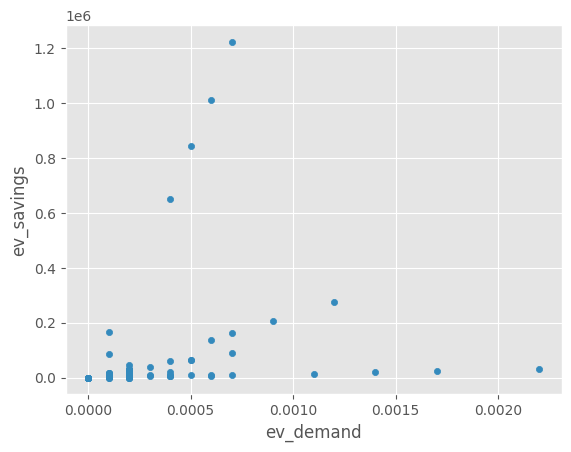

In [ ]:
ax=df_ev_ghg_merged.plot.scatter(x='ev_demand', y='ev_savings')
#df_ev_ghg_merged.plot(x='ev_savings(gco2/km)',y='ev_demand',color='Red',legend=False,ax=ax)

In [ ]:
df_ev_ghg_merged[['ev_demand','ev_savings']]

ev_demand   ev_savings
Entity      Year                        
Africa OPEC 2004     0.0000     0.000000
            2005     0.0000     0.000000
            2006     0.0000     0.000000
            2007     0.0000     0.000000
            2008     0.0000     0.000000
...                     ...          ...
Ukraine     2011     0.0001  3388.005451
            2012     0.0001  3148.614610
            2013     0.0002  6343.389335
            2014     0.0002  5451.230598
            2015     0.0004  9351.175777

[576 rows x 2 columns]

NameError: ignored

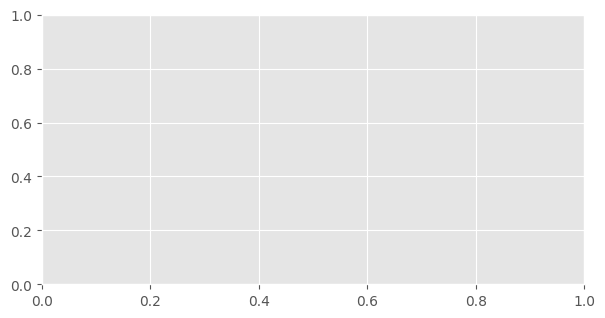

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(ev_demand, ev_savings, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7,)
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

In [ ]:
import seaborn as sns

# Split the Data into Training and Testing

In [ ]:
# Create our features
X = df_ev_ghg_merged[[ 
'Transport_x', 
'Agriculture', 
'Land-use change and forestry', 
'Waste', 'Industry', 'Manufacturing and construction', 'Transport_y',
'Electricity and heat',
'Buildings', 'Fugitive emissions', 'Other fuel combustion', 'Aviation and shipping', 'Renewables (% equivalent primary energy)',
'Renewables (% electricity)']]

# Create our target
y = df_ev_ghg_merged[['ev_savings']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
y_predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
 r2_score(y_test, y_predictions)

0.727704844938476

array([17706.51978426])

array([[-7.86282550e-02,  1.73511492e-07, -7.63955186e-06,
        -1.96004038e-04,  8.73096501e-04, -1.72148046e-04,
         7.63133057e-02, -1.58186551e-04,  4.88148659e-04,
         4.37392509e-04,  1.95885922e-04,  4.21426069e-05,
         6.84878997e+02, -6.41965802e+02]])